### <center>    San Jose State University<br>Department of Applied Data Science</center>
##  <center>    DATA 245 Sec 21<br>Machine Learning Technologies 
###  <center>   Group 4: Nupur Pathak, Revathi Boopathi, Sree Divya Cheerla, Vani Bhat




## **Credit Card Fraud Detection**


In [1]:
# Required installations
# !pip install imbalanced-learn
# !pip install sklearn
# !pip install haversine

In [2]:
# importing the required libraries
import pandas as pd
import glob
from pandas.plotting import scatter_matrix
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re 
import os
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## I. Business Understanding

* The objective of this project is to detect fraudulent credit card transactions and discuss how such frauds can be handled by employing various Machine Learning algorithms.
* Credit card usage has increased tremendously over the decade which revolutionized the cashless payment methods, but it comes with its own set of risks.
* To tackle this issue, we plan to employ Machine Learning models like Logistic Regression, Naive Bayes, KNN, Random Forest, XG Boost, SVM, and deep learning model. We will compare the performance of each model to identify the best fitting model which can help reduce fraudulent transactions. 

## II. Data Understanding

#### II.a. Collect and Store Dataset

- The synthetic data for credit card transactions for 1,000 customers is generated using the Sparkov_Data_Generation-master.
- All the transactions are created for the duration January 1, 2020 to December 31, 2021.
- The generator creates a csv file for each customer will all transactions for the given customer for the given time span.
- We will take the union of all the transactions in these csv files and load in the dataframe for our analysis. 
- The data collected from the generator is collated and stored in 'Concat.csv' on the google drive. Refer to Data_Collection_Sparkov.pynb for data generation and collation. 

In [ ]:
# Mounting the Google drive to get access in Google Colab. This step is not required if using Jupyter Notebook
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Revathi P\Documents\Sem 2\DATA_245\Project\dataset\Concat\Concat.csv", index_col = 0)
df.head(2)

ssn            cc_num  first   last gender  \
0  195-33-0728  3508835615951480  Ellen  Ortiz      F   
1  195-33-0728  3508835615951480  Ellen  Ortiz      F   

                      street            city state   zip      lat  ...  \
0  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   
1  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   

                          trans_num  trans_date trans_time     unix_time  \
0  5c15602a5cf809764ed5d149a78e279a  2021-04-29   00:07:35  1.619680e+09   
1  549fffa7671e25c7a183f2952ccff999  2021-04-29   07:10:46  1.619705e+09   

        category    amt is_fraud                          merchant  merch_lat  \
0  gas_transport   6.73      1.0  fraud_Jenkins, Hauck and Friesen  44.084527   
1  gas_transport  12.74      1.0      fraud_Zieme, Bode and Dooley  45.584705   

   merch_long  
0  -67.954129  
1  -67.692301  

[2 rows x 26 columns]

#### II.b. 3 V (Volume, Variety, Velocity) of the data

In [4]:
# Volume: To print the number of rows and columns in the dataset
df.shape

(1752721, 26)

In [5]:
# Variety: Printing the information in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752721 entries, 0 to 1752720
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    int64  
 15  profile     object 
 16  trans_num   object 
 17  trans_date  object 
 18  trans_time  object 
 19  unix_time   float64
 20  category    object 
 21  amt         float64
 22  is_fraud    float64
 23  merchant    object 
 24  merch_lat   float64
 25  merch_long  float64
dtypes: float64(7), int64(4), object(15)
memory usage: 361.0+ MB


In [6]:
# Printing the descriptive statistics for the dataset
df.describe()

cc_num           zip           lat          long      city_pop  \
count  1.752721e+06  1.752721e+06  1.752721e+06  1.752721e+06  1.752721e+06   
mean   3.843047e+17  5.121929e+04  3.755229e+01 -9.171316e+01  3.154471e+05   
std    1.257718e+18  2.977578e+04  5.158298e+00  1.640430e+01  6.226473e+05   
min    6.040616e+10  1.040000e+03  2.132950e+01 -1.593448e+02  1.760000e+02   
25%    1.800159e+14  2.729200e+04  3.387960e+01 -9.862490e+01  1.924000e+04   
50%    3.516698e+15  4.830900e+04  3.861910e+01 -8.662130e+01  6.016300e+04   
75%    4.514627e+15  7.770700e+04  4.150220e+01 -7.953990e+01  2.141120e+05   
max    4.986227e+18  9.950700e+04  6.115350e+01 -6.775340e+01  2.906700e+06   

           acct_num     unix_time           amt      is_fraud     merch_lat  \
count  1.752721e+06  1.751721e+06  1.751721e+06  1.751721e+06  1.751721e+06   
mean   4.987205e+11  1.611112e+09  7.051059e+01  5.314773e-03  3.755235e+01   
std    2.859440e+11  1.822508e+07  1.666364e+02  7.270852e-02  5.190740e+00   
min    2.348758e+09  1.577866e+09  1.000000e+00  0.000000e+00  2.032995e+01   
25%    2.720987e+11  1.595429e+09  9.020000e+00  0.000000e+00  3.383905e+01   
50%    4.956758e+11  1.609552e+09  4.385000e+01  0.000000e+00  3.848595e+01   
75%    7.408025e+11  1.627089e+09  8.126000e+01  0.000000e+00  4.150950e+01   
max    9.993899e+11  1.641024e+09  2.205483e+04  1.000000e+00  6.215252e+01   

         merch_long  
count  1.751721e+06  
mean  -9.171333e+01  
std    1.641442e+01  
min   -1.603443e+02  
25%   -9.865916e+01  
50%   -8.652043e+01  
75%   -7.944400e+01  
max   -6.675340e+01

In [7]:
# Velocity: We have generated the synthetic data once using the Sparkov Generator. This is a static one-time generated data.

#### II.c. Creating new calculated fields required for the analysis

1. Getting the area( urban/rural) from profile feature
2. Creating a new column with age calculated from the dob feature
3. Calculating distance between customer location and merchant location using latitude and longitude features
4. Extracting date and time from trans_date and trans_time features


In [8]:
# 1. Getting the area( urban/rural) from profile
df['area'] = df['profile'].str[-10 : -5]
df.head()

ssn            cc_num  first   last gender  \
0  195-33-0728  3508835615951480  Ellen  Ortiz      F   
1  195-33-0728  3508835615951480  Ellen  Ortiz      F   
2  195-33-0728  3508835615951480  Ellen  Ortiz      F   
3  195-33-0728  3508835615951480  Ellen  Ortiz      F   
4  195-33-0728  3508835615951480  Ellen  Ortiz      F   

                      street            city state   zip      lat  ...  \
0  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   
1  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   
2  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   
3  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   
4  482 Robert Light Apt. 994  Columbia Falls    ME  4623  44.6699  ...   

   trans_date  trans_time     unix_time       category     amt is_fraud  \
0  2021-04-29    00:07:35  1.619680e+09  gas_transport    6.73      1.0   
1  2021-04-29    07:10:46  1.619705e+09  gas_transport   12.74      1.0   
2  2021-04-29    10:09:12  1.619716e+09  gas_transport    9.53      1.0   
3  2021-04-29    09:15:39  1.619713e+09    grocery_pos   10.95      1.0   
4  2021-04-29    00:22:42  1.619681e+09    grocery_pos  353.18      1.0   

                           merchant  merch_lat merch_long   area  
0  fraud_Jenkins, Hauck and Friesen  44.084527 -67.954129  rural  
1      fraud_Zieme, Bode and Dooley  45.584705 -67.692301  rural  
2                   fraud_Kling Inc  45.380492 -67.385962  rural  
3                fraud_Miller-Hauck  45.350439 -67.644179  rural  
4           fraud_McDermott-Weimann  45.424536 -67.852445  rural  

[5 rows x 27 columns]

In [9]:
# 2. Creating a new column with age calculated from the dob
now = datetime.datetime.now()
df['age'] = df.dob.apply(lambda x: now.year - datetime.datetime.strptime(x,'%Y-%m-%d').year )

In [10]:
# 3. Calculating distance between customer location and merchant location
lon1 = df["long"].astype(float)
lat1 = df["lat"].astype(float)
lon2 = df["merch_long"].astype(float)
lat2 = df["merch_lat"].astype(float)

In [11]:
# Defining the haversine_array function
def haversine_array(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles = round((3958 * dist),3) #6367 for distance in KM for miles use 3958
    return miles

df['distance'] = haversine_array(df['lat'], df['long'],df['merch_lat'], df['merch_long'])

In [12]:
# 4. Extracting date and time from trans_date, trans_time
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'],format='%H:%M:%S')
df['month'] = df['trans_date'].dt.month.astype('Int64')
df['is_weekend'] = df.trans_date.dt.day_of_week.apply(lambda x: 1 if (x in [5,6]) else 0)
df['hour'] = df['trans_time'].dt.hour.astype('Int64')

In [14]:
# 5. Identifying the holiday months (November, December)
def month_categ(x):
    try:
        if (x==11) or (x==12):
          return 1
        else: return 2
    except Exception as err: pass

In [15]:
df['hol_month']=df['month'].apply(month_categ)

In [16]:
# 6. Fetching the shopping frequency
df.sort_values(by=['ssn','trans_date'],inplace=True,ascending=[True,False])
df['recent_shop']=df.groupby(['ssn'])['trans_date'].shift()
df['recent_shop_gap']=df['trans_date']-df['recent_shop']
df['recent_shop_gap']=df['recent_shop_gap'].astype('str')
# Getting customers who have recently shopped
def shop_category(x):
    if x =='0 days':
        return 'recent'
    else: 
        return 'past'
df['recent_shopper']=df['recent_shop_gap'].apply(shop_category)


In [17]:
# 7. Identifying locations which are suspicious to fraud 
# Flagging latitude based on how suspicious they are
def lat_long_category(x):
    if x <=8:
        return 1 #non-suspicious
    elif x <= 12:
        return 2 #mod-suspicious
    else: 
        return 3 #suspicious

df['lat_long']=df['lat']+df['long']
df_inter=df.groupby(['lat_long'])['is_fraud'].sum().reset_index().sort_values(by='is_fraud',ascending=False)
df_inter['lat_long_type']=df_inter['is_fraud'].apply(lat_long_category)
df=pd.merge(df,df_inter[['lat_long','lat_long_type']],how='inner',on='lat_long')

In [18]:
# 8. Identifying the categories with high prevalance of fradulent incidents 
def genuine_categ(x):
    if x <=186:
        return 1
    elif x <= 1008:
        return 2
    else:
        return 3

df_categ_inter=df.groupby(['category'])['is_fraud'].sum().reset_index(name='category_fraud').sort_values(by='category_fraud',ascending=False)
df_categ_inter['categ_type']=df_categ_inter['category_fraud'].apply(genuine_categ)
df=pd.merge(df,df_categ_inter[['category','categ_type']],how='inner',on='category')

In [19]:
# 9. Clubbing times of the day
def hour_categ(x):
    if (x==22) or (x==23) or ((x>=0) and (x<=3)):
        return 'midnight'
    else:
        return 'daylight'
df['hour_type']=df['hour'].apply(hour_categ)

In [20]:
# Verifying the newly created features
df.head(2)

ssn            cc_num   first last gender                   street  \
0  001-28-0753  4661995305641840  Pamela  Lee      F  467 Wayne Neck Apt. 187   
1  001-28-0753  4661995305641840  Pamela  Lee      F  467 Wayne Neck Apt. 187   

      city state   zip      lat  ...  is_weekend  hour hol_month recent_shop  \
0  Beverly    MA  1915  42.5608  ...           0    23       1.0         NaT   
1  Beverly    MA  1915  42.5608  ...           0    12       1.0  2021-11-16   

   recent_shop_gap recent_shopper lat_long lat_long_type categ_type  hour_type  
0              NaT           past -28.3151             1          3   midnight  
1           0 days         recent -28.3151             1          3   daylight  

[2 rows x 40 columns]

In [21]:
# df_org = df.copy()
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'area', 'age',
       'distance', 'month', 'is_weekend', 'hour', 'hol_month', 'recent_shop',
       'recent_shop_gap', 'recent_shopper', 'lat_long', 'lat_long_type',
       'categ_type', 'hour_type'],
      dtype='object')

#### II.d. Exploratory Data Analysis (EDA)

In [22]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

ssn: False
cc_num: False
first: False
last: False
gender: False
street: False
city: False
state: False
zip: False
lat: False
long: False
city_pop: False
job: False
dob: False
acct_num: False
profile: False
trans_num: False
trans_date: False
trans_time: False
unix_time: False
category: False
amt: False
is_fraud: False
merchant: False
merch_lat: False
merch_long: False
area: False
age: False
distance: False
month: False
is_weekend: False
hour: False
hol_month: False
recent_shop: True
recent_shop_gap: False
recent_shopper: False
lat_long: False
lat_long_type: False
categ_type: False
hour_type: False


- We see that there are multiple columns with missing values in the dataset. We will handle these in the data preparation stage
- We see that there are 9,310 instances of fraudulent transactions

0.0    1742411
1.0       9310
Name: is_fraud, dtype: int64



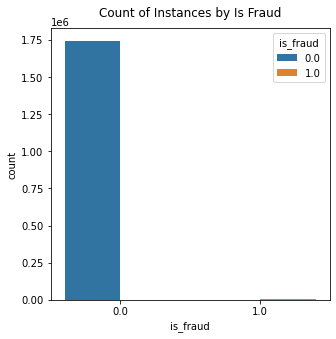

In [23]:
# Printing the target feature distribution in the dataset
print(df.is_fraud.value_counts())
print()
plt.figure(figsize = (5,5))
plt.title("Count of Instances by Is Fraud", y=1.02)
sns.countplot(x=df.is_fraud, data = df,hue = df.is_fraud)
plt.show()

- We see that the number of non-fraudulent transactions(99.5%) is higher as compared to the fradulent transactions(0.5%). Therefore, this is an imbalanced dataset. We will perform various sampling methods on our dataset in the following sections.

In [24]:
# df = df_org
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'area', 'age',
       'distance', 'month', 'is_weekend', 'hour', 'hol_month', 'recent_shop',
       'recent_shop_gap', 'recent_shopper', 'lat_long', 'lat_long_type',
       'categ_type', 'hour_type'],
      dtype='object')

In [25]:
# Drop the columns that are not necessary for the model development
df=df[['gender','city_pop','amt','is_fraud','area','age','distance','hol_month','is_weekend','hour_type','recent_shopper',\
   'lat_long_type','categ_type']]

In [26]:
# Printing the columns used in modeling
df.columns

Index(['gender', 'city_pop', 'amt', 'is_fraud', 'area', 'age', 'distance',
       'hol_month', 'is_weekend', 'hour_type', 'recent_shopper',
       'lat_long_type', 'categ_type'],
      dtype='object')

### Data Quality Report for Continuous Features

In [27]:
# Creating a dataframe with continuous attributes in the data table
df_cont = df[['city_pop','amt', 'age', 'distance']].copy()
df_cont.head()

city_pop      amt  age  distance
0     39502   317.35   95    25.136
1     39502   880.85   95     7.231
2     39502   962.98   95    14.856
3      8399   816.18   57    35.963
4      8399  1034.97   57    45.031

In [28]:
# Datatypes of continuous features
df_cont.dtypes

city_pop      int64
amt         float64
age           int64
distance    float64
dtype: object

In [29]:
# Converting the data type of 'city_pop' feature to float
df_cont.city_pop = df_cont['city_pop'].astype(float)

In [30]:
# Computing the fields for the Data Quality Report
data_types = pd.DataFrame(df_cont.dtypes,
                          columns=['Data Type'])

total_count = pd.DataFrame(df_cont.count(),
                                   columns=['Count'])

percentage_missing = pd.DataFrame(df_cont.isnull().sum()/len(df)*100,
                                   columns=['%Miss'])

cardinality = pd.DataFrame(columns=['Cardinality'])
for v in list(df_cont.columns.values):
    cardinality.loc[v] = [df_cont[v].nunique()]
    
minimum = pd.DataFrame(columns=['Min'])
for v in list(df_cont.columns.values):
    minimum.loc[v] = [df_cont[v].min()]
    
first_quartile = pd.DataFrame(columns=['1st Qrt'])
for v in list(df_cont.columns.values):
    first_quartile.loc[v] = [df_cont[v].quantile(0.25)]
    
mean = pd.DataFrame(columns=['Mean'])
for v in list(df_cont.columns.values):
    mean.loc[v] = [df_cont[v].mean()]
    
median = pd.DataFrame(columns=['Median'])
for v in list(df_cont.columns.values):
    median.loc[v] = [df_cont[v].median()]
    
third_quartile = pd.DataFrame(columns=['3rd Qrt'])
for v in list(df_cont.columns.values):
    third_quartile.loc[v] = [df_cont[v].quantile(0.75)]
    
maximum = pd.DataFrame(columns=['Max'])
for v in list(df_cont.columns.values):
    maximum.loc[v] = [df_cont[v].max()]
    
stddev = pd.DataFrame(columns=['Std_Dev'])
for v in list(df_cont.columns.values):
    stddev.loc[v] = [df_cont[v].std()]

In [31]:
# Concatinating the fields for the Data Quality Report
data_quality_report = data_types.join(total_count).join(percentage_missing).join(cardinality).join(minimum).join(first_quartile).join(mean).join(median).join(third_quartile).join(maximum).join(stddev)
print("\nData Quality Report")
print("Total records: {}".format(len(data_quality_report.index)))
data_quality_report.round(2)


Data Quality Report
Total records: 4


Data Type    Count  %Miss Cardinality     Min   1st Qrt       Mean  \
city_pop   float64  1751721    0.0         798  176.00  19240.00  315454.76   
amt        float64  1751721    0.0       60327    1.00      9.02      70.51   
age          int64  1751721    0.0          81   15.00     31.00      44.66   
distance   float64  1751721    0.0       75368    0.02     20.53      36.69   

            Median    3rd Qrt         Max    Std_Dev  
city_pop  60163.00  214112.00  2906700.00  622657.87  
amt          43.85      81.26    22054.83     166.64  
age          43.00      56.00       96.00      17.43  
distance     36.44      53.03       92.98      19.08

In [32]:
# Plotting the correlation matrix for the continuous features in the dataset
df_correlation = df.corr(method = 'pearson')
df_correlation

city_pop       amt  is_fraud       age  distance  hol_month  \
city_pop       1.000000 -0.000740 -0.001707  0.023788 -0.004023  -0.000164   
amt           -0.000740  1.000000  0.207886  0.006935 -0.000236   0.013112   
is_fraud      -0.001707  0.207886  1.000000  0.021538 -0.000451   0.009501   
age            0.023788  0.006935  0.021538  1.000000 -0.001763  -0.000371   
distance      -0.004023 -0.000236 -0.000451 -0.001763  1.000000   0.000613   
hol_month     -0.000164  0.013112  0.009501 -0.000371  0.000613   1.000000   
is_weekend    -0.002783 -0.003336 -0.014363 -0.017083 -0.001359   0.024383   
lat_long_type -0.005458 -0.006448  0.015112 -0.085162 -0.002281   0.000905   
categ_type    -0.001210  0.024179  0.057179  0.006088  0.000553  -0.160897   

               is_weekend  lat_long_type  categ_type  
city_pop        -0.002783      -0.005458   -0.001210  
amt             -0.003336      -0.006448    0.024179  
is_fraud        -0.014363       0.015112    0.057179  
age             -0.017083      -0.085162    0.006088  
distance        -0.001359      -0.002281    0.000553  
hol_month        0.024383       0.000905   -0.160897  
is_weekend       1.000000       0.011089   -0.001180  
lat_long_type    0.011089       1.000000   -0.003017  
categ_type      -0.001180      -0.003017    1.000000

<AxesSubplot:>

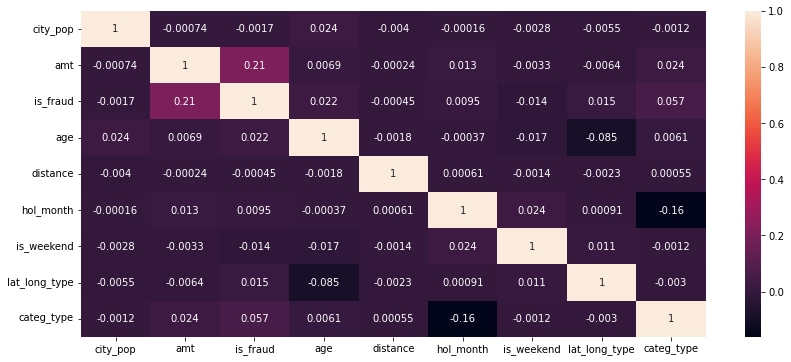

In [33]:
import seaborn as sns
%matplotlib inline
# Plotting the correlation matrix for the continuous features in the dataset
# plot the heatmap
fig, ax = plt.subplots(figsize=(14,6)) 
sns.heatmap(df_correlation,annot=True, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

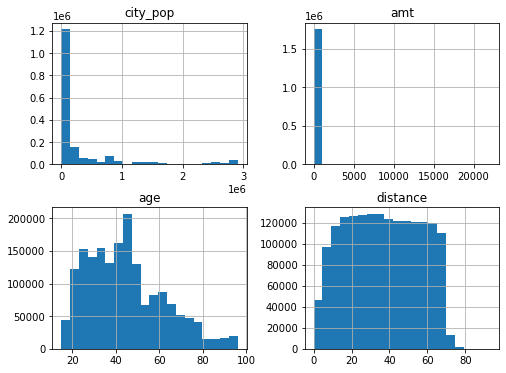

In [34]:
# Plotting the histograms for the continuous attributes in the dataset 
%matplotlib inline 

df_cont.hist(bins=20, figsize = (8,6))
plt.show()


<AxesSubplot:>

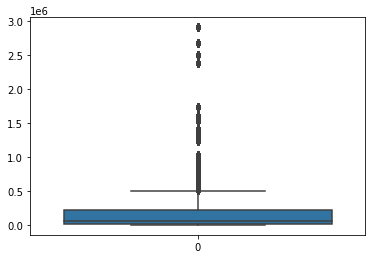

In [35]:
sns.boxplot(data = df_cont['city_pop'])

<AxesSubplot:>

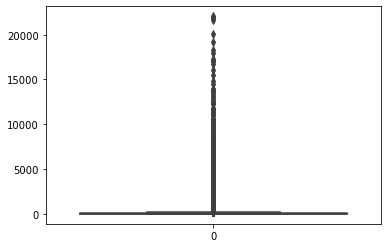

In [36]:
sns.boxplot(data = df_cont['amt'])

<AxesSubplot:>

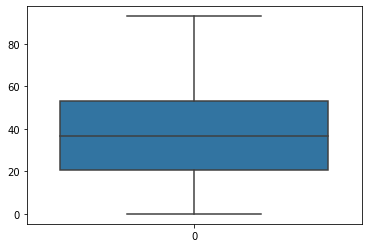

In [37]:
sns.boxplot(data = df_cont['distance'])

<AxesSubplot:>

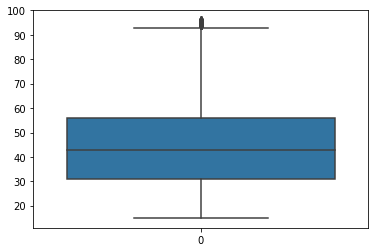

In [38]:
sns.boxplot(data = df_cont['age'])

### Data Quality Report for Categorical Features

In [39]:
# Creating a dataframe with categorical features in the data table
df_categ = df[['gender', 'is_fraud', 'area', 'hol_month', 'is_weekend', 'hour_type', 'recent_shopper', 'lat_long_type', 'categ_type']].copy()
df_categ.head()

gender  is_fraud   area  hol_month  is_weekend hour_type recent_shopper  \
0      F       1.0  urban        1.0           0  midnight           past   
1      F       1.0  urban        1.0           0  daylight         recent   
2      F       1.0  urban        1.0           0  midnight         recent   
3      F       1.0  urban        2.0           0  midnight         recent   
4      F       1.0  urban        2.0           0  daylight         recent   

   lat_long_type  categ_type  
0              1           3  
1              1           3  
2              1           3  
3              2           3  
4              2           3

In [40]:
# Printing the information of the categorical features
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751721 entries, 0 to 1751720
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   gender          object 
 1   is_fraud        float64
 2   area            object 
 3   hol_month       float64
 4   is_weekend      int64  
 5   hour_type       object 
 6   recent_shopper  object 
 7   lat_long_type   int64  
 8   categ_type      int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 133.6+ MB


In [41]:
# Converting the data type of the features to string
df_categ = df_categ.astype(str)

In [42]:
# Computing the fields for the Data Quality Report
data_types = pd.DataFrame(df_categ.dtypes,
                          columns=['Data Type'])

total_count = pd.DataFrame(df_categ.count(),
                                   columns=['Count'])

percentage_missing = pd.DataFrame(df_categ.isnull().sum()/len(df)*100,
                                   columns=['%Miss'])

cardinality = pd.DataFrame(columns=['Cardinality'])
for v in list(df_categ.columns.values):
    cardinality.loc[v] = [df_categ[v].nunique()]
    
mode = pd.DataFrame(columns=['Mode'])
for v in list(df_categ.columns.values):
    mode.loc[v] = [df_categ[v].value_counts().index.tolist()[0]]
    
mode_freq = pd.DataFrame(columns=['Mode Freq'])
for v in list(df_categ.columns.values):
    mode_freq.loc[v] = [df_categ[v].value_counts()[0]]

mode_perc = pd.DataFrame(columns=['Mode Perc'])
for v in list(df_categ.columns.values):
    mode_perc.loc[v] = [df_categ[v].value_counts()[0]/len(df_categ['gender'])*100]    
    
smode = pd.DataFrame(columns=['Second Mode'])
for v in list(df_categ.columns.values):
    smode.loc[v] = [df_categ[v].value_counts().index.tolist()[1]]
    
smode_freq = pd.DataFrame(columns=['Second Mode Freq'])
for v in list(df_categ.columns.values):
    smode_freq.loc[v] = [df_categ[v].value_counts()[1]]

smode_perc = pd.DataFrame(columns=['Second Mode Perc'])
for v in list(df_categ.columns.values):
    smode_perc.loc[v] = [df_categ[v].value_counts()[1]/len(df_categ['gender'])*100]  

In [43]:
# Concatinating the fields in the Data Quality Report
data_quality_report2 = data_types.join(total_count).join(percentage_missing).join(cardinality).join(mode).join(mode_freq).join(mode_perc).join(smode).join(smode_freq).join(smode_perc)
print("\nData Quality Report - Categorical Features")
print("Total records: {}".format(len(data_quality_report2.index)))
data_quality_report2


Data Quality Report - Categorical Features
Total records: 9


Data Type    Count  %Miss Cardinality      Mode Mode Freq  \
gender            object  1751721    0.0           2         M    895503   
is_fraud          object  1751721    0.0           2       0.0   1742411   
area              object  1751721    0.0           2     urban   1680714   
hol_month         object  1751721    0.0           2       2.0   1358082   
is_weekend        object  1751721    0.0           2         0   1055304   
hour_type         object  1751721    0.0           2  daylight   1342626   
recent_shopper    object  1751721    0.0           2    recent   1218395   
lat_long_type     object  1751721    0.0           3         2    810978   
categ_type        object  1751721    0.0           3         2    833343   

                Mode Perc Second Mode Second Mode Freq  Second Mode Perc  
gender          51.121326           F           856218         48.878674  
is_fraud        99.468523         1.0             9310          0.531477  
area            95.946444       rural            71007          4.053556  
hol_month       77.528442         1.0           393639         22.471558  
is_weekend      60.243840           1           696417         39.756160  
hour_type       76.646110    midnight           409095         23.353890  
recent_shopper  69.554170        past           533326         30.445830  
lat_long_type   46.296071           1           637355         36.384504  
categ_type      47.572816           3           546081         31.173971

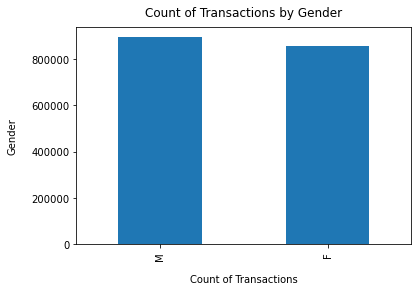

In [44]:
df.gender.value_counts().plot(kind="bar")
plt.xlabel("Count of Transactions", labelpad=14)
plt.ylabel("Gender", labelpad=14)
plt.title("Count of Transactions by Gender", y=1.02);

<AxesSubplot:>

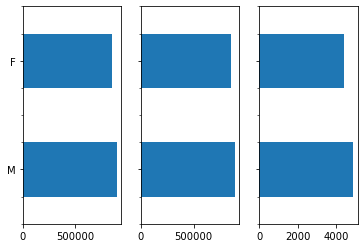

In [45]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
df.gender.value_counts().plot(kind="barh", ax = ax1)
df[df.is_fraud == 0].gender.value_counts().plot(kind="barh", ax = ax2)
df[df.is_fraud == 1].gender.value_counts().plot(kind="barh", ax = ax3)

<AxesSubplot:>

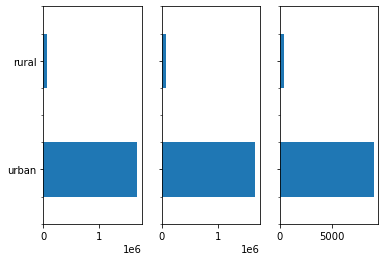

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
df.area.value_counts().plot(kind="barh", ax = ax1)
df[df.is_fraud == 0].area.value_counts().plot(kind="barh", ax = ax2)
df[df.is_fraud == 1].area.value_counts().plot(kind="barh", ax = ax3)

<AxesSubplot:>

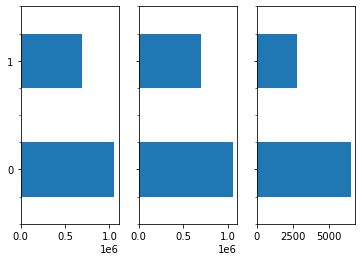

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
df.is_weekend.value_counts().plot(kind="barh", ax = ax1)
df[df.is_fraud == 0].is_weekend.value_counts().plot(kind="barh", ax = ax2)
df[df.is_fraud == 1].is_weekend.value_counts().plot(kind="barh", ax = ax3)

## III. Data Preparation

### III.a. Data Cleaning

In [48]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

gender: False
city_pop: False
amt: False
is_fraud: False
area: False
age: False
distance: False
hol_month: False
is_weekend: False
hour_type: False
recent_shopper: False
lat_long_type: False
categ_type: False


In [49]:
# Drop the instances have all null values present in the dataset
df.dropna(axis = 0, how='all', inplace = True)

# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

gender: False
city_pop: False
amt: False
is_fraud: False
area: False
age: False
distance: False
hol_month: False
is_weekend: False
hour_type: False
recent_shopper: False
lat_long_type: False
categ_type: False


In [50]:
# Removing the entries where the target feature is not available as this is required for our modeling
df.dropna(axis = 0, how='any', inplace = True) # Considered for all instances having null values in either features

In [51]:
# Checking for missing values in the dataset
for col in df.columns:
    null = df[col].isnull().values.any()
    print(f"{col}: {df[col].isna().values.any()}")

gender: False
city_pop: False
amt: False
is_fraud: False
area: False
age: False
distance: False
hol_month: False
is_weekend: False
hour_type: False
recent_shopper: False
lat_long_type: False
categ_type: False


- All the missing value fields are eliminated from the dataframe

In [52]:
# Check for duplicates
df.duplicated().value_counts()

False    1751721
dtype: int64

- Here we see there are no duplicate instances in the dataset

#### III.c. Feature Engineering

- The dataset consists of many categorical features. However, many of the machine learning models usually require numerical values as the input. Hence, necessary transformatin of data from categorical to numerical is must.In this section, we take multiple measures to convert data to make it suitable for modelling.

In [53]:
#Below are the different features in the dataset
df.columns

Index(['gender', 'city_pop', 'amt', 'is_fraud', 'area', 'age', 'distance',
       'hol_month', 'is_weekend', 'hour_type', 'recent_shopper',
       'lat_long_type', 'categ_type'],
      dtype='object')

In [54]:
# sample dataframe after dropping unnecessary columns
df.head()

gender  city_pop      amt  is_fraud   area  age  distance  hol_month  \
0      F     39502   317.35       1.0  urban   95    25.136        1.0   
1      F     39502   880.85       1.0  urban   95     7.231        1.0   
2      F     39502   962.98       1.0  urban   95    14.856        1.0   
3      F      8399   816.18       1.0  urban   57    35.963        2.0   
4      F      8399  1034.97       1.0  urban   57    45.031        2.0   

   is_weekend hour_type recent_shopper  lat_long_type  categ_type  
0           0  midnight           past              1           3  
1           0  daylight         recent              1           3  
2           0  midnight         recent              1           3  
3           0  midnight         recent              2           3  
4           0  daylight         recent              2           3

In [55]:
# Label Encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

df['categ_type']=label_encoder.fit_transform(df['categ_type'])
df['lat_long_type']=label_encoder.fit_transform(df['lat_long_type'])

In [56]:
df.columns

Index(['gender', 'city_pop', 'amt', 'is_fraud', 'area', 'age', 'distance',
       'hol_month', 'is_weekend', 'hour_type', 'recent_shopper',
       'lat_long_type', 'categ_type'],
      dtype='object')

In [57]:
# Finding dependency with the target variable using chi-squared test statistics
cols=['gender','area','hol_month','is_weekend','hour_type','recent_shopper','lat_long_type','categ_type']
for i in df[cols]:
    data_interim=df[[i, 'is_fraud']]

    data_cont=pd.crosstab(data_interim[i],data_interim['is_fraud'])

    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(data_cont)

    #-----------interpret p-value
    alpha = 0.05
    print(i,p,p<alpha)

gender 0.011816646789754925 True
area 0.9952116981974969 False
hol_month 3.384267476615273e-36 True
is_weekend 1.711962979716311e-80 True
hour_type 0.0 True
recent_shopper 1.9626976385969158e-90 True
lat_long_type 4.8147231182969436e-111 True
categ_type 0.0 True


In [58]:
# One-hot Encoding 
df = pd.get_dummies(df, columns = ['gender', 'area','hour_type','recent_shopper'])

In [59]:
# Selecting only the valuable fields
df.drop(['gender_F','area_urban','hour_type_daylight','recent_shopper_past','area_urban','area_rural'],axis=1,inplace=True)

In [60]:
# sample dataframe after one hot encoding of gender and category variable
df.head(5)

city_pop      amt  is_fraud  age  distance  hol_month  is_weekend  \
0     39502   317.35       1.0   95    25.136        1.0           0   
1     39502   880.85       1.0   95     7.231        1.0           0   
2     39502   962.98       1.0   95    14.856        1.0           0   
3      8399   816.18       1.0   57    35.963        2.0           0   
4      8399  1034.97       1.0   57    45.031        2.0           0   

   lat_long_type  categ_type  gender_M  hour_type_midnight  \
0              0           2         0                   1   
1              0           2         0                   0   
2              0           2         0                   1   
3              1           2         0                   1   
4              1           2         0                   0   

   recent_shopper_recent  
0                      0  
1                      1  
2                      1  
3                      1  
4                      1

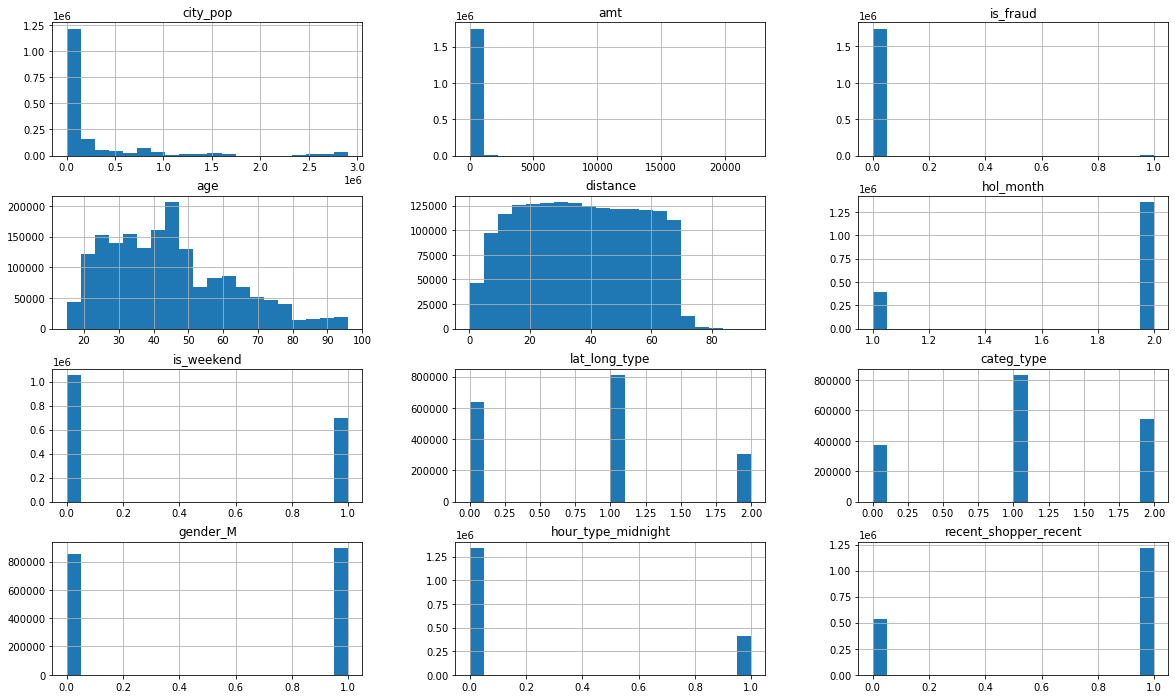

In [61]:
# Plotting the histograms for the continuous attributes in the dataset 
%matplotlib inline 

df.hist(bins=20, figsize = (20,12))
plt.show()

- From the above histogram, we can see that most of the distributions do not follow normal distribution

#### III.c  Data Scaling: Normalization

In [62]:
 ## We are doing range normalisation only for the fields which includes wide variety of values.

for col in df.columns:
    x = df[col].unique()

In [63]:
# Range normalisation

# apply normalization techniques
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# view normalized data
df.head()

city_pop       amt  is_fraud       age  distance  hol_month  is_weekend  \
0  0.013530  0.014344       1.0  0.987654  0.270223        0.0         0.0   
1  0.013530  0.039896       1.0  0.987654  0.077621        0.0         0.0   
2  0.013530  0.043620       1.0  0.987654  0.159642        0.0         0.0   
3  0.002829  0.036963       1.0  0.518519  0.386687        1.0         0.0   
4  0.002829  0.046884       1.0  0.518519  0.484230        1.0         0.0   

   lat_long_type  categ_type  gender_M  hour_type_midnight  \
0            0.0         1.0       0.0                 1.0   
1            0.0         1.0       0.0                 0.0   
2            0.0         1.0       0.0                 1.0   
3            0.5         1.0       0.0                 1.0   
4            0.5         1.0       0.0                 0.0   

   recent_shopper_recent  
0                    0.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0

In [64]:
df=pd.read_csv(r"C:\Users\Revathi P\Documents\Sem 2\DATA_245\Project\dataset\Normalized_updated_features.csv")

In [65]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [66]:
df.head(2)

city_pop       amt  is_fraud       age  distance  hol_month  is_weekend  \
0   0.01353  0.014344       1.0  0.987654  0.270223        0.0         0.0   
1   0.01353  0.039896       1.0  0.987654  0.077621        0.0         0.0   

   lat_long_type  categ_type  gender_M  hour_type_midnight  \
0            0.0         1.0       0.0                 1.0   
1            0.0         1.0       0.0                 0.0   

   recent_shopper_recent  
0                    0.0  
1                    1.0

#### III.d. Sampling

- As our data is imbalanced, we will be experimenting upsampling, downsampling, updownsampling, and SMOTE methods.

In [67]:
#separating fraud and non-fraud transaction
FraudDataset = df.loc[df['is_fraud'] == 1]
ValidDataset = df.loc[df['is_fraud'] == 0]

In [68]:
print('Count of fraudulent transations:', len(FraudDataset))
print('Count of non-fraudulent transations:', len(ValidDataset))

Count of fraudulent transations: 9310
Count of non-fraudulent transations: 1742411


In [69]:
#1) downsampling valid dataset to 9310 , total 18,620 records
#downsampling
from sklearn.utils import resample
valid_downsample = resample(ValidDataset,
             replace=True,
             n_samples= len(FraudDataset),
             random_state=42)

print(valid_downsample.shape)

(9310, 12)


In [70]:
#combining 2 datasets 
df2 = pd.concat([valid_downsample, FraudDataset])
print(df2['is_fraud'].value_counts())

0.0    9310
1.0    9310
Name: is_fraud, dtype: int64


<AxesSubplot:ylabel='Type'>

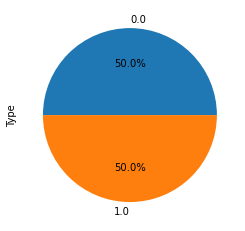

In [71]:
#plotting piechart after resampling
df2.groupby('is_fraud').size().plot(kind='pie',
                                       y = 'is_fraud',
                                       label = "Type",
                                       autopct='%1.1f%%')

In [72]:
X = df2.drop(labels='is_fraud', axis=1)
y = df2['is_fraud']
X.shape, y.shape

((18620, 11), (18620,))

In [73]:
#2)Upsampling fraud dataset to  17,42411 , total 3484822 records
# #upsampling
# from sklearn.utils import resample
# fraud_upsample = resample(FraudDataset,
#              replace=True,
#              n_samples=len(ValidDataset),
#              random_state=42)

# print(fraud_upsample.shape)

In [74]:
# #combining 2 datasets 
# df2 = pd.concat([fraud_upsample, ValidDataset])
# print(df2['is_fraud'].value_counts())

In [75]:
# #plotting piechart after resampling
# df2.groupby('is_fraud').size().plot(kind='pie',
#                                        y = 'is_fraud',
#                                        label = "Type",
#                                        autopct='%1.1f%%')

In [76]:
#3) upsampling and downsamplimg to some threhold  value say 50000
# #downsampling
# from sklearn.utils import resample
# valid_downsample = resample(ValidDataset,
#              replace=True,
#              n_samples= 50000,
#              random_state=42)

# print(valid_downsample.shape)

In [77]:
# #upsampling
# from sklearn.utils import resample
# fraud_upsample = resample(FraudDataset,
#              replace=True,
#              n_samples=len(valid_downsample),
#              random_state=42)

# print(fraud_upsample.shape)

In [78]:
# #combining 2 datasets 
# df2 = pd.concat([fraud_upsample, valid_downsample])
# print(df2['is_fraud'].value_counts())

In [79]:
# #plotting piechart after resampling
# df2.groupby('is_fraud').size().plot(kind='pie',
#                                        y = 'is_fraud',
#                                        label = "Type",
#                                        autopct='%1.1f%%')

In [80]:
#4) SMOTE - upsampling fraud dataset to 17,42411  - it might create noisy data by over sampling
# X = df.drop(labels='is_fraud', axis=1)
# y = df[['is_fraud']]

In [81]:
# su = SMOTE(random_state=42)

In [82]:
# su.fit_resample(X,y)

In [83]:
# X_su, y_su = su.fit_resample(X, y)

In [84]:
# #combining 2 datasets 
# df2 = pd.concat([X_su, y_su])
# print(df2['is_fraud'].value_counts())

In [85]:
# #plotting piechart after resampling
# y_su.groupby('is_fraud').size().plot(kind='pie',
#                                        y = 'is_fraud',
#                                        label = "Type",
#                                        autopct='%1.1f%%')

#### III.e. Split data into Training and Testing

In [86]:
# df = df.iloc[: , 1:]
# df.head(2)

In [87]:
# # assigning features to X and target to y

# X = df[['city', 'city_pop', 'job', 'category', 'amt', 'merchant',
#        'distance', 'year', 'month', 'day_of_month', 'is_weekend', 'hour',
#        'gender_F', 'gender_M', 'age_category_adult', 'age_category_senior',
#        'age_category_young', 'area_rural', 'area_urban']]

# y = df.is_fraud

In [88]:
# splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y,train_size=.80,shuffle = True, random_state= 42)

print(f'Training dataset : {xtrain.shape} {ytrain.shape}') # dimension of train set
print(f'Testing dataset : {xtest.shape}, {ytest.shape}') # dimension of test set

Training dataset : (14896, 11) (14896,)
Testing dataset : (3724, 11), (3724,)


#### Dimentionality Reduction using PCA

In [89]:
# # Plotting scree plot to decide the number of principle components required
# # Experiment on whether standardization or normalization for PCA (mostly they use both, but need to read more)

# pca = PCA(n_components=10)

# #fit PCA model to data
# pca_fit = pca.fit(xtrain)

# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.show()

In [90]:
# # 4 components are selected based on observation from screeplot
# # This will consider 4 principle components from the dataframe which can further be used for modelling
# pca = PCA(n_components=4)
# X_train = pca.fit_transform(xtrain)
# X_test = pca.transform(xtest)

## IV. Modeling

In [91]:
# Random Forest

In [ ]:
# Normal

In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)

y_pred=clf.predict(xtest)

In [66]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=['non fraud','fraud']))

              precision    recall  f1-score   support

   non fraud       0.94      0.95      0.95      1862
       fraud       0.95      0.94      0.95      1862

    accuracy                           0.95      3724
   macro avg       0.95      0.95      0.95      3724
weighted avg       0.95      0.95      0.95      3724



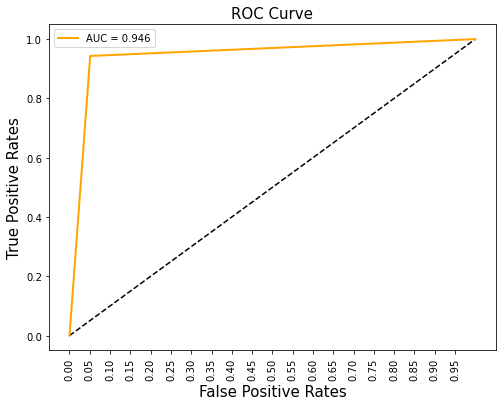

In [67]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(ytest, y_pred)
knn_auc = roc_auc_score(ytest, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)


In [68]:
# Hyperparameter Tuning

In [86]:
# Using GridsearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier(n_estimators=100)
ss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
params = [{'criterion':["gini","entropy"],"max_depth":[5,6,7,8,9,10,11,12],"class_weight":["balanced"],"random_state":[18]\
          ,"max_features":['sqrt','log2']}]
GSCV = GridSearchCV(clf,params,scoring="roc_auc",cv=ss)
GSCV.fit(xtrain,ytrain)
GSCV.best_params_
best_model = GSCV.best_estimator_

In [87]:
GSCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'random_state': 18}

In [88]:
from sklearn.metrics import roc_curve

preds = best_model.predict_proba(xtrain)[:,1]

fpr, tpr, thresholds = roc_curve(ytrain, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (GSCV.predict_proba(xtest)[:,1] >= optimal_threshold).astype(bool)

In [89]:
optimal_threshold

0.5787892259366217

In [90]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=['non fraud','fraud']))

              precision    recall  f1-score   support

   non fraud       0.93      0.96      0.94      1862
       fraud       0.96      0.92      0.94      1862

    accuracy                           0.94      3724
   macro avg       0.94      0.94      0.94      3724
weighted avg       0.94      0.94      0.94      3724



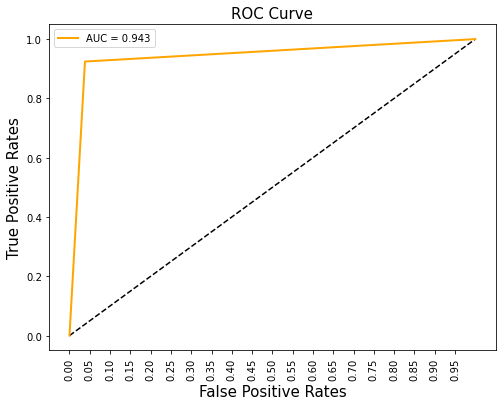

In [74]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(ytest, y_pred)
knn_auc = roc_auc_score(ytest, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)


In [91]:
combined_df = pd.concat([xtest, ytest], axis=1) 
combined_df['ypred_best'] = y_pred.tolist()
combined_df.head()
combined_df.to_csv('rf_pred.csv')

In [75]:
# XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier(booster='gbtree',n_estimators=100,random_state=0)
clf.fit(xtrain, ytrain)
y_pred=clf.predict(xtest)

In [76]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=['non fraud','fraud']))

              precision    recall  f1-score   support

   non fraud       0.95      0.95      0.95      1862
       fraud       0.95      0.95      0.95      1862

    accuracy                           0.95      3724
   macro avg       0.95      0.95      0.95      3724
weighted avg       0.95      0.95      0.95      3724



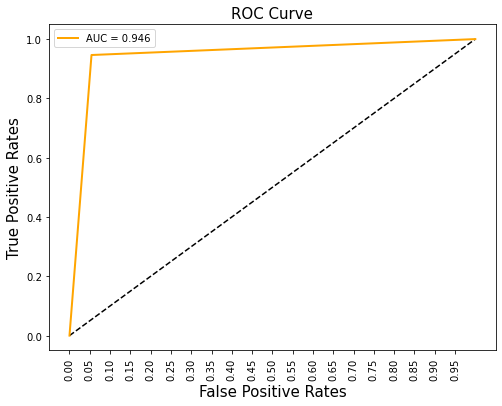

In [77]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(ytest, y_pred)
knn_auc = roc_auc_score(ytest, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)

In [92]:
# Using GridsearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

ss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
clf = XGBClassifier(booster='gbtree',n_estimators=100,random_state=0)
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
GSCV = GridSearchCV(clf,params,scoring="roc_auc",cv=ss)
GSCV.fit(xtrain,ytrain)
GSCV.best_params_
best_model = GSCV.best_estimator_

In [93]:
GSCV.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [95]:
from sklearn.metrics import roc_curve

preds = best_model.predict_proba(xtrain)[:,1]

fpr, tpr, thresholds = roc_curve(ytrain, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred = (GSCV.predict_proba(xtest)[:,1] >= optimal_threshold).astype(bool)

In [96]:
optimal_threshold

0.47471753

In [97]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=['non fraud','fraud']))

              precision    recall  f1-score   support

   non fraud       0.95      0.94      0.95      1862
       fraud       0.94      0.95      0.95      1862

    accuracy                           0.95      3724
   macro avg       0.95      0.95      0.95      3724
weighted avg       0.95      0.95      0.95      3724



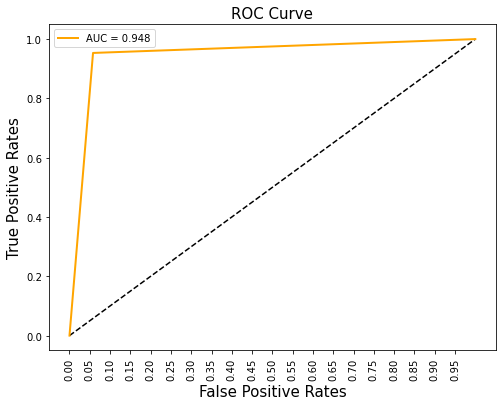

In [85]:
# Importing the required metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#defining roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label,color='orange')
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

#plotting ROC curve
fpr, tpr, threshold = roc_curve(ytest, y_pred)
knn_auc = roc_auc_score(ytest, y_pred)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % knn_auc)

In [130]:
combined_df

city_pop       amt       age  distance  hol_month  is_weekend  \
436323   0.313079  0.000296  0.580247  0.552687        1.0         0.0   
398140   0.011839  0.000248  0.074074  0.444634        1.0         1.0   
821750   0.014608  0.000020  0.493827  0.659567        1.0         0.0   
1580062  0.187499  0.000345  0.444444  0.397509        1.0         0.0   
1486509  0.073075  0.008427  0.382716  0.329880        1.0         0.0   
...           ...       ...       ...       ...        ...         ...   
262276   0.005496  0.003979  0.283951  0.407018        0.0         1.0   
74872    0.055897  0.007195  0.271605  0.155770        1.0         1.0   
481781   0.031022  0.013299  0.185185  0.420851        1.0         0.0   
1087920  0.002478  0.001151  0.259259  0.728938        1.0         1.0   
410663   0.072592  0.014453  0.864198  0.257218        1.0         0.0   

         lat_long_type  categ_type  gender_M  hour_type_midnight  \
436323             0.5         1.0       1.0                 1.0   
398140             0.5         1.0       1.0                 0.0   
821750             0.5         0.5       0.0                 0.0   
1580062            0.5         0.5       1.0                 1.0   
1486509            1.0         0.5       0.0                 0.0   
...                ...         ...       ...                 ...   
262276             0.5         1.0       0.0                 1.0   
74872              0.0         1.0       0.0                 0.0   
481781             0.5         1.0       1.0                 1.0   
1087920            0.0         0.0       1.0                 1.0   
410663             0.0         1.0       0.0                 1.0   

         recent_shopper_recent  is_fraud  ypred_best  
436323                     1.0       0.0        True  
398140                     1.0       0.0       False  
821750                     0.0       0.0       False  
1580062                    1.0       0.0        True  
1486509                    1.0       0.0       False  
...                        ...       ...         ...  
262276                     1.0       0.0       False  
74872                      1.0       0.0       False  
481781                     1.0       1.0        True  
1087920                    1.0       0.0       False  
410663                     1.0       1.0        True  

[3724 rows x 13 columns]